In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

####  Get the glass dataset. 

In [2]:
df = pd.read_csv('glass.data',header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


#### Write code to remove the first attribute (which is a unique ID)

In [4]:
df1=df.drop(columns=[0])

In [5]:
df1

,1,2,3,4,5,6,7,8,9,10
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


#### Get the remaining attributes as reals, and extract the class label (which is the last element in each line of glass.data)

In [6]:
reals=df1.iloc[:,:9]

In [7]:
reals

,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11


In [8]:
class_labels=df1.loc[:,10]

In [9]:
class_labels

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
184    6
185    7
186    7
187    7
188    7
189    7
190    7
191    7
192    7
193    7
194    7
195    7
196    7
197    7
198    7
199    7
200    7
201    7
202    7
203    7
204    7
205    7
206    7
207    7
208    7
209    7
210    7
211    7
212    7
213    7
Name: 10, Length: 214, dtype: int64

#### Use scikit's SVC class with the default parameters to train a classifier and report the accuracy of that classifier on the training set.

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [11]:
svc=SVC()
svc.fit(reals,class_labels)
y_pred=svc.predict(reals)

C:\Users\G. K. PATNAIK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [12]:
accuracy_score(y_pred=y_pred, y_true=class_labels)*100

76.16822429906543

#### Use scikit's PCA class to reduce the dimensionality of the dataset to 2 dimensions and do the following: (1) plot the data colored by class label in the reduced space; (2) report the percent of variance accounted for in that reduced space; (3) train a classifier (SVM) on the reduced data and report the training set accuracy.

In [13]:
pca = PCA(n_components=2)

In [14]:
principalComponents = pca.fit_transform(reals)

In [15]:
pca.components_

array([[ 0.00092813,  0.01722483, -0.72353491,  0.04633522, -0.00769381,
        -0.07840429,  0.6797168 ,  0.07635801,  0.0009057 ],
       [-0.00152291,  0.39879755, -0.54305099,  0.25884075,  0.19409249,
         0.10382664, -0.61672464,  0.22354513, -0.01678426]])

In [16]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf['class_labels']=class_labels

In [17]:
principalDf.head(5)

,principal component 1,principal component 2,class_labels
0,-1.431425,-1.102115,1
1,-1.436707,0.343585,1
2,-1.427322,0.345720,1
3,-1.257825,-0.249060,1
4,-1.312466,-0.018405,1


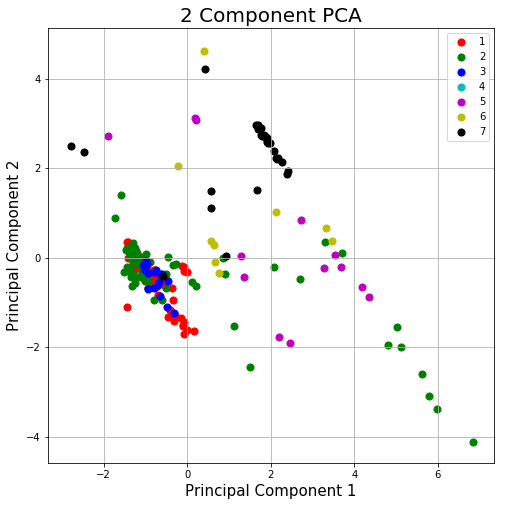

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [1, 2, 3,4,5,6,7]
colors = ['r', 'g', 'b','c','m','y','k']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['class_labels'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [19]:
pca.explained_variance_ratio_

array([0.47620525, 0.26319276])

In [20]:
svc.fit(principalComponents,class_labels)
y_pred=svc.predict(principalComponents)

C:\Users\G. K. PATNAIK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [21]:
accuracy_score(y_pred=y_pred, y_true=class_labels)*100

71.02803738317756

#### Increase the dimensionality of the reduced space by 1 and repeat the step above (reporting all outputs) until the training set accuracy in the reduced space is within 4 points of the accuracy in the full space.

In [22]:
pca = PCA(n_components=3)

In [23]:
principalComponents = pca.fit_transform(reals)

In [24]:
pca.components_

array([[ 0.00092813,  0.01722483, -0.72353491,  0.04633522, -0.00769381,
        -0.07840429,  0.6797168 ,  0.07635801,  0.0009057 ],
       [-0.00152291,  0.39879755, -0.54305099,  0.25884075,  0.19409249,
         0.10382664, -0.61672464,  0.22354513, -0.01678426],
       [-0.00137689, -0.65493473, -0.13119888,  0.05565214,  0.69195133,
         0.21856507, -0.07877842, -0.13387643,  0.00721253]])

In [25]:
svc.fit(principalComponents,class_labels)
y_pred=svc.predict(principalComponents)

C:\Users\G. K. PATNAIK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [26]:
accuracy_score(y_pred=y_pred, y_true=class_labels)*100

72.89719626168224

Our accuracy of 72.89% lies within 4 points of the accuracy of the full space which is 76.16 so we won't reduce the dimension further.

In [27]:
from mpl_toolkits.mplot3d import Axes3D

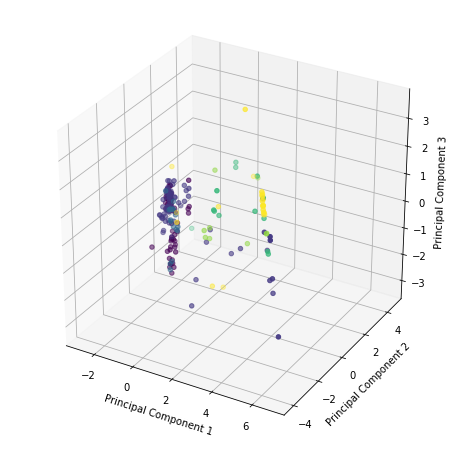

In [28]:
x, y ,z = zip(*principalComponents)
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=class_labels)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.grid()
plt.show()

####  Inspect the components and write a few sentences about what features each of them seems to be emphasizing. Explain how you arrived at that conclusion.

The first component PC1 emphasizes on class_labels 3 and 7 because value of 3 is close to -1 and value of 7 is close to 1.

The second component PC2 is emphasizing on showing positive correlation and on class_labels=3 and 5 showing negative correlation as their values are close to -1 and 1.

The Third component PC3 is emphasizing on class_labels 2 which is showing negative correlation and 5 which is showing positive correlation as their values are close to -1 and +1

The last two features don't contribute a lot and hence have low importance and the data has very less variance.

How I arrived at this conclusion:
The values of the Principal components are very important for the features as these components will be used by PCA to transform the data. In that case when the transformation takes place, the values close to 1 won't change that much but the values close  to 0 will diminish and contribute less in the transformed data.